#### `Import Libraries`

In [1]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from IPython.display import display, HTML

warnings.filterwarnings("ignore")
%matplotlib inline

#### `Required Functions`

In [2]:
class LinearRegression_From_Scratch(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.x_mean = None
        self.y_mean = None
        self.slope = None
        self.intercept = None

    def get_mean(self, arr):
        '''
        Mean is the average of a data set.
        The mode is the most common number in a data set.
        The median is the middle of the set of numbers.
        Standard deviation is a measure of the amount of variation or dispersion of a set of values.
        A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, 
        while a high standard deviation indicates that the values are spread out over a wider range.
        '''    
        return np.sum(arr)/len(arr)

    def get_variance(self, arr, mean):
        '''
        Variance is a measure of how much the data for a variable varies from it's mean
        '''    
        return np.sum((arr-mean)**2)

    def get_covariance(self, arr_x, mean_x, arr_y, mean_y):
        '''
        Covariance is a measure of relationship between 2 variables that is scale dependent,
        i.e. how much will a variable change when another variable changes
        What is correlation : Correlation is a statistical measure that expresses the extent to which two variables are linearly related
        Correlation overcomes the lack of scale dependency that is present in covariance by standardizing the values. 
        This standardization converts the values to the same scale, the example below will the using the Pearson Correlation Coeffiecient. 
        The equation for converting data to Z-scores
        correlation formula : z_score = (ithvalue(xi) - mean(x)) / stdev(x)
        '''
        final_arr = (arr_x - mean_x)*(arr_y - mean_y)
        return np.sum(final_arr)

    def get_regression_coefficients(self, x, y):
        '''
        Regression Equation: y = mx + c
        # m(slope/coefficient/weight) = cov(x, y) / var(x)
        # c(constant/intercept/bias) = y - m*x
        '''
        self.x_mean = self.get_mean(x)
        self.y_mean = self.get_mean(y)
        m = self.get_covariance(x, self.x_mean, y, self.y_mean)/self.get_variance(x, self.x_mean)
        c = self.y_mean - self.x_mean*m
        print("slope --> ", m)
        print("intercept --> ", c)
        return m, c

    def fit(self, x, y):
        '''
        Train Ordinary Least Squares Regression Model
        '''
        self.slope, self.intercept = self.get_regression_coefficients(x, y)
        return (self.slope, self.intercept)

    def predict(self, indep_arr):
        ''' 
        Get Predictions
        '''
        predictions_list = [(self.slope*x + self.intercept) for x in indep_arr]
        return predictions_list


def get_plot(df, prediction_flag):
    '''
    Independent Variables vs Dependent Variables Plot
    '''
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    plt.scatter("Product_Sell", "Revenue_Generation", data=df)
    if prediction_flag == True:
        ax = sns.lineplot("Product_Sell", "Predictions", data=df, color = "orange")
        ax.lines[0].set_linestyle("--")
        sns.scatterplot("Product_Sell", "Predictions", data=df, color = 'black')
        ax.get_legend().remove()
    plt.xlabel("Product_Sell")
    plt.ylabel("Revenue_Generation")
    # plt.title("Product_Sell vs Revenue_Generation: $Y_i$ vs $\hat{Y}_i$")
    plt.title("Product_Sell vs Revenue_Generation")
    plt.show()

def actuals_vs_prediction_plot(df):
    '''
    Actuals vs Prediction Plot
    '''    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    sns.scatterplot("Product_Sell", "Revenue_Generation", data=df, color = 'blue', label="Actual")
    sns.scatterplot("Product_Sell", "Predictions", data=df, color = 'orange', label="Prediction")
    plt.xlabel("Product_Sell")
    plt.ylabel("Revenue_Generation")
    # plt.title("Product_Sell vs Revenue_Generation: $Y_i$ vs $\hat{Y}_i$")
    plt.title("Actuals vs Predictions")
    plt.show()

def mse(true,pred):
    ''' 
    Calculate MSE value
    '''    
    return np.mean((pred-true)**2)

def rmse(true,pred):
    ''' 
    Calculate RMSE value
    '''
    return mse(true,pred)**0.5

def r_squared(true,pred):
    ''' 
    Calculate r_squared value
    '''    
    true_mean=true.mean()
    pred_mean=pred.mean()
    tot=((true-true_mean)**2).sum(axis=0)
    obs=((true-pred)**2).sum(axis=0)
    return 1-(obs/tot)


#### `Sample Data`

In [3]:
companya_sales_data = """
Product_Sell,Revenue_Generation
10,1000
15,1400
18,1800
22,2400
26,2600
30,2800
5,700
31,2900
"""

df = pd.read_table(StringIO(companya_sales_data), sep=",")
display(HTML(df.to_html()))

,Product_Sell,Revenue_Generation
0,10,1000
1,15,1400
2,18,1800
3,22,2400
4,26,2600
5,30,2800
6,5,700
7,31,2900


- **Product_Sell vs Revenue_Generation Plot**

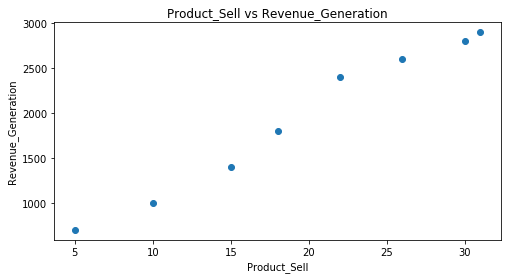

In [4]:
##### Plot #####
get_plot(df, prediction_flag=False)

### `Train Model Using - Pipeline Scratch:Linear Regression Wrapper Class`

- **Train Ordinary Least Squares Regression Model**

In [5]:
##### Training Data #####
df_train = df.loc[:len(df)-3]
x = df_train["Product_Sell"]
y = df_train["Revenue_Generation"]

##### Creating Pipeline #####
pipe_1 = Pipeline(steps=[
                        ("Linear_Regression_Model_Scratch", LinearRegression_From_Scratch())
                ])

##### Fit Ordinary Least Squares Regression Model & Get Regression Coefficients #####
pipe_1.fit(x, y)

slope -->  95.97024178549286
intercept -->  64.60012399256061


Pipeline(steps=[('Linear_Regression_Model_Scratch',
                 LinearRegression_From_Scratch())])

- **Get Predictions**

In [6]:
##### Get Predictions #####
predictions_list = pipe_1.predict(df_train["Product_Sell"].tolist())
df_train["Predictions"] = predictions_list
display(HTML(df_train.to_html()))

,Product_Sell,Revenue_Generation,Predictions
0,10,1000,1024.302542
1,15,1400,1504.153751
2,18,1800,1792.064476
3,22,2400,2175.945443
4,26,2600,2559.826410
5,30,2800,2943.707378


- **Product_Sell vs Revenue_Generation + Regression Plot**

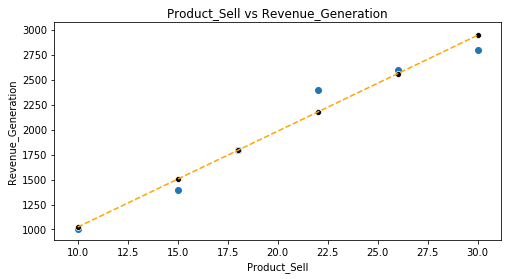

In [7]:
##### Plot #####
get_plot(df_train, prediction_flag=True)

- **Predictions on Test Data**

In [9]:
##### Predictions on unseen data #####
df_test = df.loc[max(df_train.index.tolist())+1:]
predictions_list = pipe_1.predict(df_test["Product_Sell"].tolist())
df_test["Predictions"] = predictions_list

display(HTML(df_test.to_html()))

,Product_Sell,Revenue_Generation,Predictions
6,5,700,544.451333
7,31,2900,3039.677619


- **Actuals vs Predictions Plot[Test Data]**

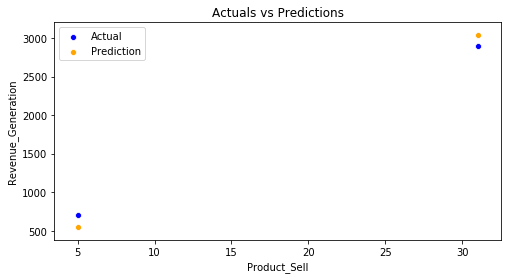

In [10]:
actuals_vs_prediction_plot(df_test)

- **Predictions on unseen data**

In [11]:
''' 
Product_Sell = [1, 20]
'''
df_unseen_data = np.array([1, 20]).reshape(-1, 1)

predictions_list = pipe_1.predict(df_unseen_data)

print("Revenue_Generation Predictions --> ", predictions_list)

Revenue_Generation Predictions -->  [array([160.57036578]), array([1984.0049597])]


- **`Model Performance Evaluation`**

- **RMSE Value**

In [12]:
rmse(df_test["Revenue_Generation"],df_test["Predictions"])

147.82629193692188

- `Observation`
  - Actual values are located 147.82 units away from the predicted values

- **R_Squared Value**

In [13]:
r_squared(df_test["Revenue_Generation"],df_test["Predictions"])

0.9819399895968429

- `Observation`
  - Model is able to observe 98.19% of the total variability of the data set.

### `Train Model Using - Standard Sklearn Pipeline`

- **`Using Pipeline`**

In [15]:
##### Train & Test Data #####
# X_train = df_train["Product_Sell"]
# Y_train = df_train["Revenue_Generation"]
X_train = np.array(df_train['Product_Sell']).reshape(-1, 1)
Y_train = np.array(df_train['Revenue_Generation']).reshape(-1, 1)

##### Creating Pipeline #####
pipe_2 = Pipeline(steps=[
                        ("Linear_Regression_Model_Sklearn", LinearRegression())
                ])

##### Train Model Using Pipeline #####
pipe_2.fit(X_train, Y_train)

# lm.coef_[0]
# print("Coefficient --> ", pipe_2.coef_)
# print("Intercept --> ", pipe_2.intercept_)

Pipeline(steps=[('Linear_Regression_Model_Sklearn', LinearRegression())])

- `Observation`
  - Above Sklearn Model Coefficient & Intercept are matching with our manually trained model parameters.

In [16]:
##### Get Predictions on Test Data #####
X_test = np.array(df_test["Product_Sell"]).reshape(-1, 1)
Y_pred = pipe_2.predict(X_test)
df_test["Predictions"] = Y_pred

display(HTML(df_test.to_html()))

,Product_Sell,Revenue_Generation,Predictions
6,5,700,544.451333
7,31,2900,3039.677619


- **Actuals vs Predictions Plot[Test Data]**

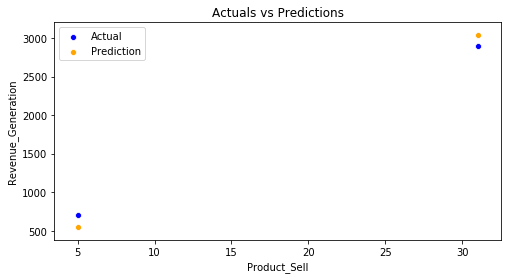

In [17]:
actuals_vs_prediction_plot(df_test)

- **Predictions on unseen data**

In [18]:
''' 
Product_Sell = [1, 20]
'''
df_unseen_data = np.array([1, 20]).reshape(-1, 1)

pipe_2.predict(df_unseen_data)

array([[ 160.57036578],
       [1984.0049597 ]])

- **RMSE Value**

In [19]:
rmse(df_test["Revenue_Generation"],df_test["Predictions"])

147.82629193692188

- **R_Squared Value**

In [20]:
r_squared(df_test["Revenue_Generation"],df_test["Predictions"])

0.9819399895968429

- `Observation`
  - As both Sklearn model & our manually trained model parameters are matching. So, both model's RMSE & R_Squared values are also matching.